In [1]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Step 2: Load train and test datasets
train_df = pd.read_csv("Titanic_train.csv")
test_df = pd.read_csv("Titanic_test.csv")
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df = train_df.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'])

In [4]:
test_df = test_df.drop(columns=['Name', 'PassengerId', 'Cabin', 'Ticket'])

In [5]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [6]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
train_df['Sex']=train_df['Sex'].replace({'male': 1, 'female': 0})
test_df['Sex']=test_df['Sex'].replace({'male': 1, 'female': 0})


In [8]:
train_df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,NaN,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [9]:
# Step 3: EDA - Explore features
train_df.info()
train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,NaN


In [10]:
train_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
#handling missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace = True)
train_df['Embarked'].fillna(train_df['Embarked'].mode(), inplace = True)

In [12]:
test_df.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [ ]:
#handling missing values
test_df['Age'].fillna(test_df['Age'].median(), inplace = True)

In [14]:
print(train_df)
print(test_df)

     Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    1  22.0      1      0   7.2500        S
1           1       1    0  38.0      1      0  71.2833        C
2           1       3    0  26.0      0      0   7.9250        S
3           1       1    0  35.0      1      0  53.1000        S
4           0       3    1  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    1  27.0      0      0  13.0000        S
887         1       1    0  19.0      0      0  30.0000        S
888         0       3    0  28.0      1      2  23.4500        S
889         1       1    1  26.0      0      0  30.0000        C
890         0       3    1  32.0      0      0   7.7500        Q

[891 rows x 8 columns]
     Pclass  Sex   Age  SibSp  Parch      Fare Embarked
0         3    1  34.5      0      0    7.8292        Q
1         3    0  47.0      1      0    7.0000        S
2         2    1  62.0      

In [15]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
train_df.isnull().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:

train_df['Embarked']=train_df['Embarked'].replace({'Q': 1, 'C': 0 , 'S':2})
train_df['Embarked'].fillna(train_df['Embarked'].median(), inplace = True)

test_df['Embarked']=test_df['Embarked'].replace({'Q': 1, 'C': 0 , 'S':2})
test_df['Embarked'].fillna(test_df['Embarked'].median(), inplace = True)

In [19]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0
887,1,1,0,19.0,0,0,30.0000,2.0
888,0,3,0,28.0,1,2,23.4500,2.0
889,1,1,1,26.0,0,0,30.0000,0.0


In [20]:
test_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [21]:
test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

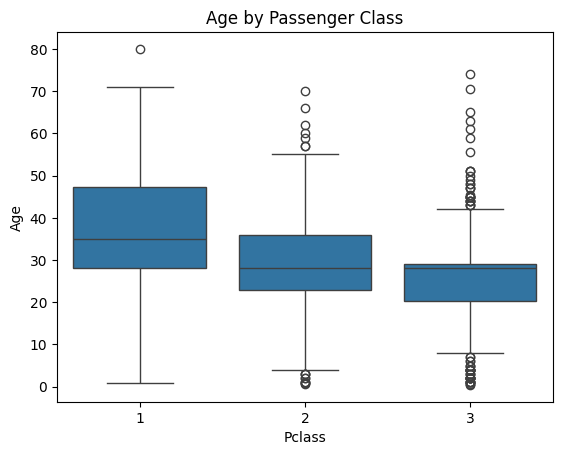

In [22]:
sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title("Age by Passenger Class")
plt.show()

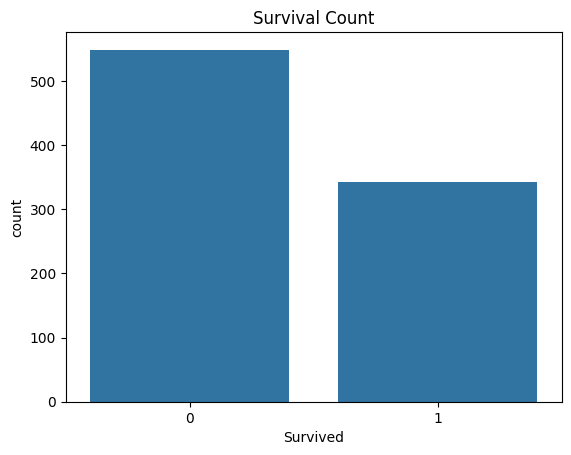

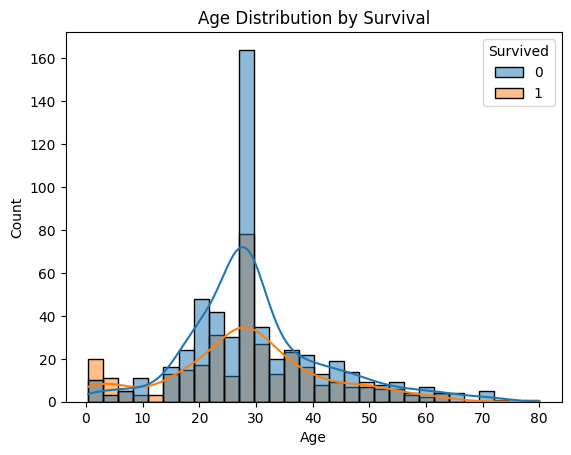

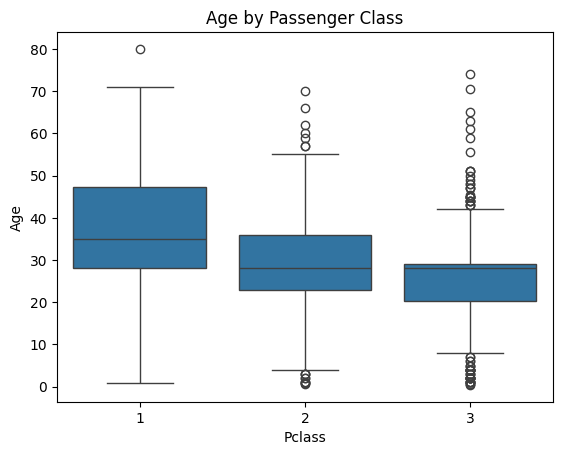

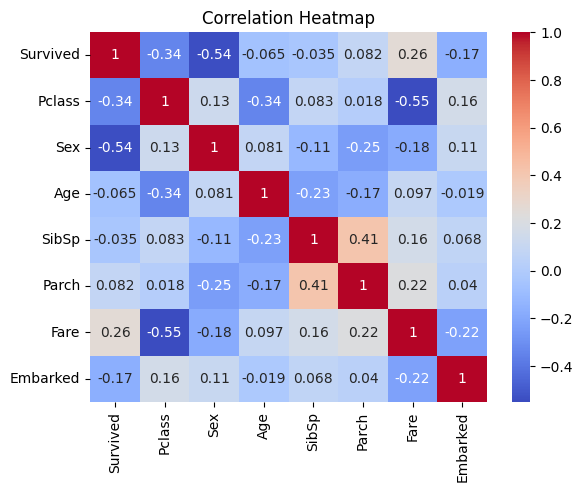

In [23]:
# Step 4: Visualizations
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()

sns.histplot(data=train_df, x='Age', hue='Survived', kde=True)
plt.title("Age Distribution by Survival")
plt.show()

sns.boxplot(x='Pclass', y='Age', data=train_df)
plt.title("Age by Passenger Class")
plt.show()

sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [24]:

train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2.0
1,1,1,0,38.0,1,0,71.2833,0.0
2,1,3,0,26.0,0,0,7.9250,2.0
3,1,1,0,35.0,1,0,53.1000,2.0
4,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2.0
887,1,1,0,19.0,0,0,30.0000,2.0
888,0,3,0,28.0,1,2,23.4500,2.0
889,1,1,1,26.0,0,0,30.0000,0.0


In [25]:


X = train_df.drop(['Survived',], axis=1)
y = train_df['Survived']


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 48.9 KB


In [27]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,27.0,0,0,8.0500,2
414,1,0,39.0,0,0,108.9000,0
415,3,1,38.5,0,0,7.2500,2
416,3,1,27.0,0,0,8.0500,2


In [28]:
# Step 7: Train/Test split (internal)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [30]:
# Step 8: Build logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
# Step 9: Evaluate model
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))


Accuracy: 0.8044692737430168
Precision: 0.782608695652174
Recall: 0.7297297297297297
F1 Score: 0.7552447552447552
ROC AUC: 0.8818532818532818


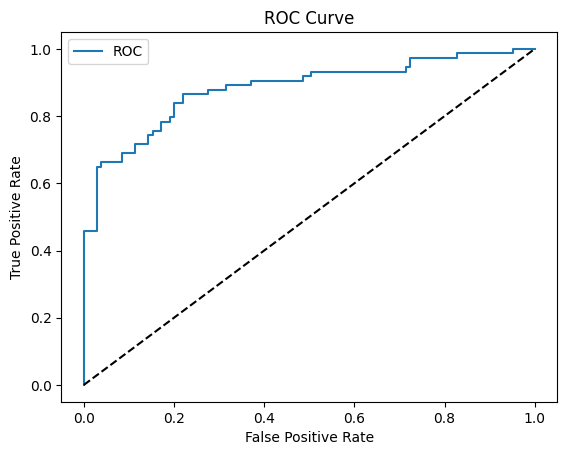

In [32]:
# Step 10: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='ROC')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [33]:
# Step 11: Coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coeff_df.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
5,Fare,0.126216
4,Parch,-0.098292
6,Embarked,-0.170860
3,SibSp,-0.349582
2,Age,-0.395574
0,Pclass,-0.782061
1,Sex,-1.278865


In [34]:
# Step 12: Save model and scaler for Streamlit
import pickle
pickle.dump(model, open("titanic_model.pkl", "wb"))
pickle.dump(scaler, open("titanic_scaler.pkl", "wb"))


### 1. What is the difference between precision and recall?

**Precision**  
- Precision tells us **out of all the positive predictions, how many are actually correct**.  
- Formula:  
  \[
  Precision = \frac{TP}{TP + FP}
  \]
- High precision = very few false positives.  
- Useful when the **cost of false positives is high** (e.g., spam detection).  

**Recall**  
- Recall tells us **out of all the actual positives, how many were correctly predicted**.  
- Formula:  
  \[
  Recall = \frac{TP}{TP + FN}
  \]
- High recall = very few false negatives.  
- Useful when the **cost of false negatives is high** (e.g., disease detection).  

👉 In short:  
- **Precision = Focus on correctness of positive predictions.**  
- **Recall = Focus on completeness of positive predictions.**

---

### 2. What is cross-validation, and why is it important in binary classification?

**Cross-validation**  
- Cross-validation is a model evaluation technique where data is split into multiple subsets (folds).  
- The model is trained on some folds and tested on the remaining fold, and this process is repeated for all folds.  
- Example: **k-Fold Cross-Validation** splits data into *k* parts, trains on *k-1* parts, and tests on the 1 remaining part.  

**Why it is important in binary classification?**  
1. Provides a **more reliable estimate** of model performance compared to a single train-test split.  
2. Helps in **detecting overfitting** and underfitting.  
3. Ensures model performs well across different data subsets.  
4. Useful when dataset size is small and every data point matters.  
